In [76]:
#kernel crashes when matplotlib is used
#conda install freetype=2.10.4
#conda install nomkl

In [77]:
#conda uninstall tokenizers, transformers

In [1]:
!pip install transformers -q
#!pip install pytorch-transformers

     ---------------------------------------- 0.0/499.4 kB ? eta -:--:--
     -- ------------------------------------ 30.7/499.4 kB 1.3 MB/s eta 0:00:01
     -------- ----------------------------- 112.6/499.4 kB 1.3 MB/s eta 0:00:01
     ----------------- -------------------- 225.3/499.4 kB 1.7 MB/s eta 0:00:01
     ------------------------- ------------ 337.9/499.4 kB 1.9 MB/s eta 0:00:01
     ----------------------------------- -- 471.0/499.4 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 499.4/499.4 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
     ---------------------------------------- 64.6/64.6 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [46 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\tokenizers
  copying tokenizers\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers
  creating build\lib.win-amd64-cpython-39\tokenizers\models
  copying tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers\models
  creating build\lib.win-amd64-cpython-39\tokenizers\decoders
  copying tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers\decoders
  creating build\lib.win-amd64-cpython-39\tokenizers\normalizers
  copying tokenizers\normalizers\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers\normalizers
  creating build\lib.win-amd64-cpython-39\tokenizers\pre_tokenizers
  copying tokenizers\pre_tokenizers\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers\pre_tokenizers
  creating build\l

In [79]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [80]:
!pip install ipywidgets

In [2]:
from transformers import BertModel, BertTokenizerFast

alephbert_tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
alephbert = BertModel.from_pretrained('onlplab/alephbert-base')

# if not finetuning - disable dropout
#alephbert.eval()

ModuleNotFoundError: No module named 'yaml'

In [82]:
!pip install tea

In [83]:
!pip install seaborn

In [1]:
import sys
import codecs
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os

In [2]:
#!git clone https://github.com/omilab/Neural-Sentiment-Analyzer-for-Modern-Hebrew
#!mv Neural-Sentiment-Analyzer-for-Modern-Hebrew/data data

In [3]:
def load_data(filename):
    data = list(codecs.open(filename, 'r', 'utf-8').readlines())
    x, y = zip(*[d.strip().split('\t') for d in data])
    x = np.asarray(list(x))
    #y = to_categorical(y, 3)
    
    return x, np.array(list(map(int, y)))

In [16]:
train_tokens, train_tags = load_data('data_sen/token_train.tsv')
test_tokens, test_tags = load_data('data_sen/token_test.tsv')
train_tokens.shape, train_tags.shape

((10244,), (10244,))

In [10]:
sample_txt = 'מתי הייתי בחוץ בפעם האחרונה? אני תקוע בבית שבועיים.'

In [89]:
tokens = alephbert_tokenizer.tokenize(sample_txt)
token_ids = alephbert_tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: מתי הייתי בחוץ בפעם האחרונה? אני תקוע בבית שבועיים.
   Tokens: ['מתי', 'הייתי', 'בחוץ', 'בפעם', 'האחרונה', '?', 'אני', 'תקוע', 'בבית', 'שבועיים', '.']
Token IDs: [2649, 2565, 5415, 5106, 4101, 35, 1876, 14244, 2308, 6988, 18]


In [90]:
alephbert_tokenizer.sep_token, alephbert_tokenizer.sep_token_id

('[SEP]', 3)

In [91]:
alephbert_tokenizer.cls_token, alephbert_tokenizer.cls_token_id

('[CLS]', 2)

In [92]:
alephbert_tokenizer.pad_token, alephbert_tokenizer.pad_token_id

('[PAD]', 0)

In [93]:
alephbert_tokenizer.unk_token, alephbert_tokenizer.unk_token_id

('[UNK]', 1)

In [94]:
conda install -c conda-forge jupyterlab

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [95]:
encoding = alephbert_tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt', 
)
encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\User\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


dict_keys(['input_ids', 'attention_mask'])

In [96]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([    2,  2649,  2565,  5415,  5106,  4101,    35,  1876, 14244,  2308,
         6988,    18,     3,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

In [97]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [98]:
alephbert_tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'מתי',
 'הייתי',
 'בחוץ',
 'בפעם',
 'האחרונה',
 '?',
 'אני',
 'תקוע',
 'בבית',
 'שבועיים',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [99]:
len(train_tokens)

10244

In [100]:
len(test_tokens)

2560

In [101]:
tokens = np.append(train_tokens,test_tokens)
tokens_tags = np.append(train_tags,test_tags)
print(len(tokens))
len(tokens_tags)

12804


12804

In [102]:
token_lens = []

for txt in tokens:
    tok = alephbert_tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tok))

In [103]:
token_lens

[17,
 5,
 6,
 22,
 10,
 9,
 33,
 38,
 18,
 56,
 5,
 8,
 38,
 42,
 49,
 8,
 3,
 17,
 11,
 3,
 22,
 23,
 12,
 12,
 28,
 20,
 20,
 278,
 81,
 16,
 7,
 104,
 10,
 10,
 6,
 5,
 40,
 41,
 27,
 12,
 25,
 89,
 14,
 11,
 15,
 17,
 12,
 17,
 23,
 21,
 72,
 10,
 7,
 32,
 11,
 8,
 61,
 11,
 8,
 5,
 26,
 22,
 10,
 9,
 9,
 3,
 11,
 7,
 32,
 40,
 11,
 69,
 14,
 5,
 21,
 34,
 27,
 5,
 27,
 24,
 21,
 18,
 38,
 6,
 66,
 57,
 22,
 3,
 56,
 45,
 10,
 8,
 14,
 11,
 16,
 21,
 14,
 12,
 12,
 13,
 33,
 7,
 11,
 9,
 35,
 20,
 12,
 43,
 31,
 12,
 5,
 26,
 14,
 64,
 22,
 13,
 72,
 36,
 8,
 19,
 9,
 7,
 20,
 28,
 40,
 12,
 3,
 43,
 13,
 8,
 54,
 16,
 5,
 27,
 435,
 10,
 14,
 112,
 15,
 16,
 19,
 21,
 61,
 11,
 20,
 30,
 7,
 10,
 9,
 18,
 24,
 8,
 7,
 17,
 23,
 12,
 10,
 15,
 14,
 6,
 5,
 61,
 14,
 29,
 31,
 15,
 44,
 35,
 12,
 6,
 8,
 41,
 60,
 45,
 6,
 6,
 33,
 11,
 14,
 51,
 19,
 32,
 3,
 8,
 31,
 8,
 81,
 16,
 17,
 18,
 7,
 29,
 14,
 13,
 214,
 5,
 11,
 47,
 36,
 13,
 5,
 29,
 30,
 13,
 13,
 10,
 5,
 28,
 9,
 

Text(0.5, 0, 'Token count')

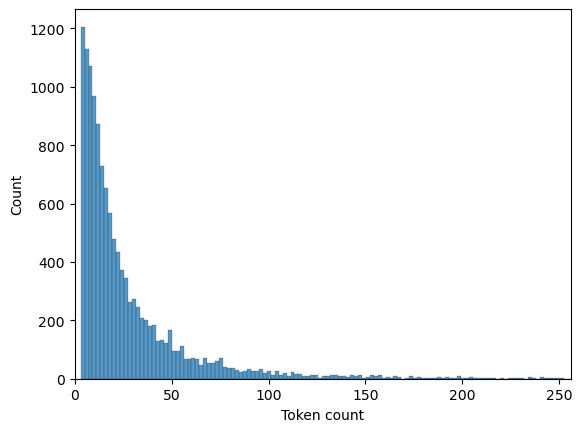

In [158]:
sns.histplot(token_lens)
plt.xlim([0, 256])
plt.xlabel('Token count')

In [106]:
MAX_LEN = 160

In [107]:
import torch

In [108]:
torch.__version__

'2.0.0'

In [109]:
!pip install -q tb-nightly
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [110]:
import torch
from torch.utils.data import Dataset, DataLoader

In [111]:
class GPReviewDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.reviews)
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(review, add_special_tokens=True, max_length=self.max_len, return_token_type_ids=False, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt',)
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [112]:
def create_data_loader(df,df_tags, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        #reviews=df.to_numpy(),
        #targets=df_tags.to_numpy(),
        reviews=df,
        targets=df_tags,   
        tokenizer=tokenizer,
        max_len=max_len
      )
    return DataLoader(
        ds,
        batch_size=batch_size,
        #windows
        num_workers=0
        #colab
        #num_workers=4
      )

In [113]:
!pip install -U scikit-learn

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_val, x_test , Y_val, Y_test = train_test_split(test_tokens, test_tags, test_size = 0.2, random_state = 42)  

In [116]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(train_tokens, train_tags, alephbert_tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(x_val,Y_val, alephbert_tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(x_test,Y_test, alephbert_tokenizer, MAX_LEN, BATCH_SIZE)

In [117]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [118]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [119]:
#alephbert
last_hidden_state, pooled_output = alephbert(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask']
)

In [120]:
alephbert.config.hidden_size

768

In [121]:
from torch import nn, optim

In [122]:
class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('onlplab/alephbert-base', return_dict=False)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        output = self.drop(pooled_output)
        return self.out(output)

In [123]:
class_names = ['negative', 'neutral', 'positive']
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SentimentClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias

In [124]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
print(input_ids.shape)
print(attention_mask.shape)

torch.Size([16, 160])
torch.Size([16, 160])


In [125]:
torch.nn.functional.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.2666, 0.4412, 0.2922],
        [0.2675, 0.4163, 0.3162],
        [0.3344, 0.4198, 0.2459],
        [0.3567, 0.4265, 0.2168],
        [0.2756, 0.3846, 0.3398],
        [0.2818, 0.4029, 0.3153],
        [0.2621, 0.4466, 0.2913],
        [0.2223, 0.5424, 0.2353],
        [0.2270, 0.5146, 0.2584],
        [0.1856, 0.6322, 0.1821],
        [0.2215, 0.4511, 0.3275],
        [0.2291, 0.3877, 0.3832],
        [0.1840, 0.5054, 0.3106],
        [0.2937, 0.3725, 0.3338],
        [0.3259, 0.3888, 0.2853],
        [0.2619, 0.4584, 0.2796]], grad_fn=<SoftmaxBackward0>)

In [126]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [127]:
EPOCHS = 10
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

C:\Users\User\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [128]:
def train_epoch(model, data_loader,  loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    return correct_predictions.double() / n_examples, np.mean(losses)

In [129]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
    return correct_predictions.double() / n_examples, np.mean(losses)

In [130]:
from collections import defaultdict

In [131]:
%%time
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    train_acc, train_loss = train_epoch(model, train_data_loader, loss_fn, optimizer, device, scheduler, len(train_tokens))
    print(f'Train loss {train_loss} accuracy {train_acc}')
    val_acc, val_loss = eval_model(model, val_data_loader, loss_fn, device, len(x_val))
    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.34114047134797815 accuracy 0.8753416634127295
Val   loss 0.24573446637805318 accuracy 0.912109375

Epoch 2/10
----------
Train loss 0.130673733095467 accuracy 0.9633932057789926
Val   loss 0.2950528096362177 accuracy 0.9296875

Epoch 3/10
----------
Train loss 0.051474495326690434 accuracy 0.9875048809058962
Val   loss 0.3327412476310201 accuracy 0.93896484375

Epoch 4/10
----------
Train loss 0.02619118243517182 accuracy 0.9945333853963295
Val   loss 0.368918874353767 accuracy 0.943359375

Epoch 5/10
----------
Train loss 0.020082766274667697 accuracy 0.9961928934010152
Val   loss 0.3871973851740904 accuracy 0.94091796875

Epoch 6/10
----------
Train loss 0.008240785010518342 accuracy 0.9983404919953144
Val   loss 0.43562916989094447 accuracy 0.9423828125

Epoch 7/10
----------
Train loss 0.005673512294342289 accuracy 0.9985357282311597
Val   loss 0.4313502742583353 accuracy 0.94287109375

Epoch 8/10
----------
Train loss 0.004100224504589834 accurac

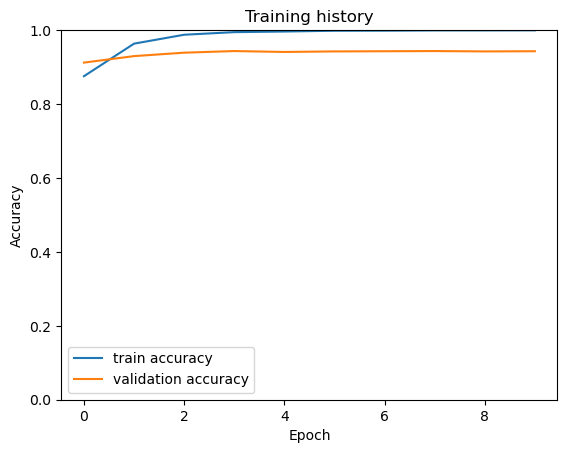

In [132]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [152]:
model.load_state_dict(torch.load('best_model_state.bin'))

<All keys matched successfully>

In [154]:
test_acc, test_loss = eval_model(model, test_data_loader, loss_fn, device, len(x_test))

In [155]:
print(f'Val   loss {test_loss} accuracy {test_acc}')

Val   loss 0.3450132042844416 accuracy 0.94921875
